import necessary libraries

go to the anaconda prompt and activate the spacy environment
install the necessary packages.

In [25]:
#import pandas
import pandas as pd
#import spacy
import spacy
from collections import Counter
#import matplotlib
import matplotlib.pyplot as plt
#import wordcloud
from wordcloud import WordCloud


print  the first review data from drugscom.csv

In [26]:
data_frame = pd.read_csv('drugscom.csv')
reviews = data_frame['Review'].tolist()
# Print the first review
print(reviews[0])
print(reviews[1])
print(type(reviews[0]))

Lipitor (atorvastatin) for High Cholesterol 							"So I went to the doctor for peripheral neuropathy and back spasms.  She does my bloodwork and my cholesterol is extremely high.  She puts me on generic Lipitor and it made my back spasms even worse.  Now my upper back has a tremor that still hasn't gone away even after quitting the drug 2 months ago.  I have loss strength in my legs and I  have terrible short term memory. It would give me dizzy spells and I just felt sick all the time.  I'm still recovering from it and I told my doctor I quit taking it because it was making me shake. Now she wants me to start taking it again, but I'm not going to,"
Lipitor (atorvastatin) for High Cholesterol 							"After taking Lipitor for a few weeks I developed pain in both my legs ,arms and shoulders . After three months all my muscles were heavy and under powered I could hardly exercise .  I stopped taking Lipitor and some three months later I am nearly back to normal!
<class 'str'>


introduce the reviews into spacy

In [27]:
# Load spaCy language model
nlp = spacy.load('en_core_web_lg')
doc = nlp(str(reviews))

data preprocessing

In [28]:
# Preprocess the data
processed_data = []
# Iterate over the reviews
# and tokenize the text to remove stopwords and punctuations
# and lemmatize the text
# and convert it to lowercase
# and append it to processed_data
for review in reviews:
    doc = nlp(str(review))
    processed_data.append([token.lemma_.lower() for token in doc if not token.is_stop and token.is_alpha])

print the  processed datas

In [22]:
# Print the first processed review
print(processed_data)

[['lipitor', 'atorvastatin', 'high', 'cholesterol', 'go', 'doctor', 'peripheral', 'neuropathy', 'spasm', 'bloodwork', 'cholesterol', 'extremely', 'high', 'put', 'generic', 'lipitor', 'spasm', 'bad', 'upper', 'tremor', 'go', 'away', 'quit', 'drug', 'month', 'ago', 'loss', 'strength', 'leg', 'terrible', 'short', 'term', 'memory', 'dizzy', 'spell', 'feel', 'sick', 'time', 'recover', 'tell', 'doctor', 'quit', 'take', 'make', 'shake', 'want', 'start', 'take', 'go'], ['lipitor', 'atorvastatin', 'high', 'cholesterol', 'take', 'lipitor', 'week', 'develop', 'pain', 'leg', 'arm', 'shoulder', 'month', 'muscle', 'heavy', 'powered', 'hardly', 'exercise', 'stop', 'take', 'lipitor', 'month', 'later', 'nearly', 'normal'], ['nan'], ['lipitor', 'atorvastatin', 'high', 'cholesterol', 'delay', 'effect', 'take', 'year', 'realize', 'statin', 'memory', 'loss', 'big', 'time', 'muscle', 'pain', 'mood', 'issue', 'discover', 'risk', 'high', 'ldl', 'massively', 'exaggerated', 'have', 'sufficient', 'hdl', 'matter'

remove the unsuitable words through formation of custom_stop_words

In [23]:
 #Flatten the processed data
flattened_data = [word for review in processed_data for word in review]

custom_stop_words = ['read', 'drug', 'day', 'mg', 'year', 'month', 'effect', 'stop', 'doctor', 'feel', 'muscle', 'leg',
                      'medication', 'start', 'week', 'take', 'go', 'med', 'have', 'like', 'work', 'time', 'tell',
                      'know', 'ago', 'want', 'try' , 'lipitor' ,'atorvastatin','high', 'blood work' ,'extremely','put','generic','bad','upper','away','quit','ago','loss','strength','terrible','short','term','spell','sick','recover','make','good','change','severe','problem','medicine','low','low','normal','nan','daily','walk','horrible','cause','sleep','prescribe','stomach','suffer','continue','diet','well','prevention','lower','say','reduce','feeling','old','foot','hdl','barely','level','disease','find','range','familial','memory','finally','memory','finally','result','arm','hope','later','long','think','doc','statin','experience','help','night','dosage','triglyceride','blood test','body','clode','need','today','total cholesterol','lot','people','soon','different','reaction','neck','thing','immediately','life','heart','give','cardiologist','half','drop','ldl','eye','eat','right','body','way','ask','poison','pill','hour','develop','need','look','crestor','today','notice','quality','dose','dr','increase','close','leave','wake','slowly','food','stopped','end','suggest','total','cholesterol','liver','energy','heterozygous','maybe','extreme','skin','etc','quickly','hip','lipid','sure','new','talk','toilet','light','decide','knee','age','review','test','issue','great','attack','male','tablet','especially','gas','number','face','cardiovascular','artery','blood','effective','hurt','hand','weight','damage','follow','symptoms','come','lose','probably','hospital','believe','morning','couple','sore','little','past','far','let','keep','happy','point','check','adverse','block','kind','begin','overall','past','switch','unable','minute','run','finger','throat','health','stent','affect','shoulder','chest','head','call','active','hurt','recommend','exercise','pressure','sugar','realize','ear','see','dry','yr','healthy','negative','left','bed','gain','atorvastatin','able','bit','realize','red','fog','clear','thank','wait','improve','hive','recently','hear','er','stand','constantly','place','wonder','difficulty','research','positive','die','hard','wish','brain','happen','report','gp','care','painful','weak','stay','diabetic','zocor','stuff','shape','pretty','pound','cut','last','include','ratio','function','wish','surgery','non','fact','miserable','joint','mean','plus','climp','comment','unbearable','disappear','lab','near','yrs','mess','rate','discontinue','plaque','january','course','story','ankle','fine','nearly','small','watch','history','sorry','figure','atorvastain','stair','treatment','period','straight','second','bloodwork','prescription','plan','similar','risk','upset','tolerate','cardiac','manufacturer','tab','appointment','diagnose','control','homozygous','order','pleased','cough','abdominal','atorvastatin','calf','concern','gym','cold','breath','angry','wife','remember','agree','reason','eventually','combine','push','person','worth','heavy','drive','mile','zero','live','all','return','enzyme','panel','anymore','tab','neuropathy','carb','yes','despite','order','carry','alternative','ability','mile','rise','sound','nose','pass','rosuvastatin','reading','bring','water','niacin','properly','overweight','aspirin','yeast','rice','visit','climb','middle','subside','big','wrong','add','company','primary','show','list','completely','slight','adjust','question','heel','amazing','awful','family','acute','white','fall','sharp','accept','roll','fall','vision','instead','elevate','careful','thought','careful','usual','fat','il','husband','toe','sense','matter','lucky','break','simvastatin','excellent','cognitive','condition','drink','script','refill','friend','spacey','stiff','benefit','speak','constant','crazy','slightly','totally','kidney','focus','bloated','nerve','focus','difficult','willing','trouble','advise','guess','zetia','procedure','tomorrow','supplement','site','thigh','appear','emergency','stroke','intolerant','mainly','runner','scary','patient','pick','actually','blockage','horrendous','bruise','dairy','occur','previously','blurred','statin','female','use','play','main','retire','stick','hereditary','use','huge','listen','sit','genetic','asleep','swelling','understand','flu','prevent','significantly','tia','ring','yesterday','chill','produce','self','product','discharge','option','optimal','weird','bend','ill','burn','panic anxiety','symptoms','insurance','brick','lift','forearm','everyday','cry','myopathy','discover','moderate','chair','debilitate','eliminate','fit','therapist','count','suddenly','glute','clearly','previous','hardly','send','space','symptom','sensation','deal','extremity','dramatically','cripple','sneak','spread','mind','relate','bother','valve','trip','deep','excruciating','major','split','dad','interfere','panic anxiety','request','side','dark','impossible','cardiac','market','contact','bloat','bike','insist','dull','dangerous','april','mgs','prior','relief','injury','greatly','pharmacy','drs','atorvastatin','statins','unbelievably','thankfully','destroy','americans','early','public','groin','brand','perspective','perfect','fun','hopefully','borderline','local','plant','chronic','multiple','sensitivity','evening','swallow','horse','plenty','act','advise','ready','idea','color','fearful','wonderful','street','glad','usage','website','necessary','cardio','worse','bypass','entire','world','average','aortic','regular','beat','consider','advice','distance','substantially','meat','god','apetax','okay','twice','hold','blotch','afraid','fortunately','one','wave','stool','habit','unpleasant','twitch','bulk','enjoy','zone','loose','inside','strong','restless','whatsoever','common','treat','february','shingle','percent','walgreens','large','possible','dice','breathe','runny','decrease','acupuncturist','dream','commercial','anti','slow','hit','fast','concentrate','improvement','single','phase','noticeable','apotex','august','diminish','wobbly','case','pure','niaspan','diminish','alt','athletic','additionally','scan','answer','vertebral','diabete','coincidental','complete','edema','lipitor','failure','cover','forgetfulness','vacation','easily','general','spot','digestive','specialist','felt','occasion','lifestyle','yellowish','vein','hell','mention','discuss','email','internal','require','yard','wrist','sweating','anger','forget','forum','carotid','keto','parkinson','alot','money','neurologist','heat','refuse','degree','warning','urine','associate','ubiquinol','foggy','killer','hole','desk','chore','instant','waste','chair','share','colour','woman','thyroid','particle','legal','power','luck','hamstring','offline','absolutely','recent','tightness','tri','simply','cocktail','generally','trust','elevated','sufficient','physical','tight','carbs','mood','jo','word','message','stab','therapy','eczema','unwell','job','massively','unwell','peripheral','event','horror','ok','attribute','confusion','leaky','truth','mild','statistic','lip','chart','vast majority','fourth','starting','march','aching','torse','starting','massage','son','turn','fire','unusual','permanent','frequently','fully','measure','plague','folk','force','struggle','urgent','confuse','tongue','delayed','shocked','anybody','hi','vast majority','cholesteral','swing','reduction','hypertension','atorvastatin','los','exaggerated','get','spasm','pain','conclude','motion','specific','fiber','resolve','ret','limp','e','d','pyronnie','s','imo','admit','suspect','incidence','moment','reboot','skew','handful','claim','overreaction','frequency','modern','pharmacology','allergic','genesis','vast','majority','perplex','gout','flare','up','stupid','crutch','article','crippled','bathtub','original','rest','apartment','convince','weigh','ton','circle','steadily','sever','ck','bloating','greasy','suggestion','hesitant','outer','x','ray','placement','terminal','write','pay','attention','combination','caduet','zombie','motor','skill','triglycerids','lovastatin','gemfibrozil','nosebleed','works','tingle','ezetrol','inflammatory','likely','cataract','monitor','bladder','thankful','lipitor','monday','atovastatin','uneasiness','baby','peach','oval','continuous','mom','swell','normalize','pale','peel','lapse','note','tenderness','triglycerides','blur','hepatitus','target','frequent','prolong','weekly','sudden','explanation','pee','bra','touch','adversely','rls','disorder','rhabdo','goodness','halo','tavr','transcatheter','replacement','address','real','situation','fill','scratchy','rosu','basically','injure','panicky','uncertain','impair','rid','love','musculoskeletol','poor','clean','gluten','regimen','resistance','training','magnesium','categorize','prediabetic','fasting','glucose','hcp','regret','recheck','maximum','literally','hospitalize','threaten','mediterranean','scramble','collapse','outside','dementia','special','genetically','raise','met','orthopedic','vengeance','exorcise','metaphorically','sort','correlation','google','ciu','idiopathic','sort','normalcy','seven','conversely','snake','room','pt','link','bind','book','ana','speckled','false','lupin','horrific','charlie','palpitation','trigger','bang','impact','seek','set','aldolase','shall','inflammation','waking','sciatia','torso','interrupted','library','deadly','pitavastatin','swap','btw','solid','ibf','dance','score','irritable','taking','headed','diazepam','paracetamol','lactulose','expensive','afford','afford','promotional','discount','cheap','nurse','benadryl','be','frightened','dehydration','breast','size','dollar','chicken','pox','summer','cool','weather','pharmacist','till','atherosclerosis','aorta','wicked','moodiness','normally','personality','commence','settle','withdrawal','dreadful','jelly','minimal','avoid','factor','alter','financial','tough','awfulness','approval','vivid','existent','gap','meet','arch','suitable','fibromyalgia','basis','flag','tailbone','rectal','bleeding','bulb','colonoscopy','bleed','yo','wm','sustain','career','unacceptable','surprising','discovery','pin','garlic','sterol','lecithin','wear','diaper','glyceride','eating','bloathe','panic','belly','organ','lousy','gerd','couch','kindly','assertively','longer','achille','tendon','private','physo','lady','swim','regularly','saviour','given','offer','overwork','warrant','interim','hopeful','hubby','yellow','undergo','plain','practice','dawn','persuasive','dare','prevail','trouser','pocket','convinced','guinea','pig','ex','sportsman','pravachol','aug','reuters','pharmaceutical','giant','pfizer','mount','lawsuit','blockbuster','warn','lorstat','rating','wee','stuck','dietitian','pharmacies','ie','cvs','osco','army','express','scripts','manufacture','country','colitis','listless','worst','anal','leakage','tendinitis','dire','available','occasionally','tc','dunno','']
# Remove the custom stop  words
flattened_data = [word for word in flattened_data if word not in custom_stop_words]

# Print the first 10 words
print(flattened_data[:10])

# Perform bag-of-words analysis
word_freq = Counter(flattened_data)



['tremor', 'dizzy', 'shake', 'powered', 'delay', 'losing', 'cramp', 'itching', 'lasting', 'ache']


plot wordcloud

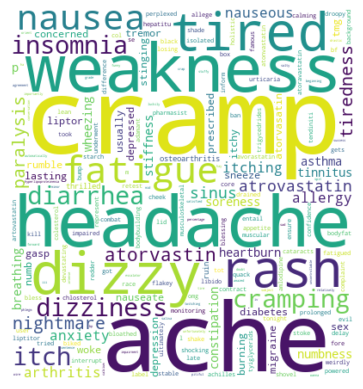

In [24]:
wordcloud = WordCloud(background_color='white')

# Create and generate a word cloud image:
wordcloud = WordCloud(width=400, height=430, background_color='white').generate(' '.join(flattened_data))

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

print the first review from webmdcom.csv

In [29]:
# Extract the reviews into a list
data_frame = pd.read_csv('webmdcom.csv')
reviews = data_frame['Review'].tolist()
print(reviews[0])
print(reviews[1])
print(type(reviews[0]))

I was diagnosed with high cholesterol, HDL low, LDH? Day 1-100 days: 1 grapefruit/day , exercise (run for 30 minutes=2 miles) & low carbohydrate diet (180 gms/day). Fasting blood test showed Increase HDL by 2.5%, still high cholesterol at 260s.  Day 101: 5 mg/day for one day has caused extreme lightheadedness, tiredness. Stop. Doesn't feel right for my body. Looking for options.
No issue so far. I don't have high cholesterol and don't know how my levels have changed, but I don't have any other issues so far.
<class 'str'>


introduce the reviews into spacy

In [30]:
# Load spaCy language model
nlp = spacy.load('en_core_web_lg')
doc = nlp(str(reviews))

print the first processed data

In [32]:
# Preprocess the data
processed_data = []
# Iterate over the reviews
# and tokenize the text to remove stopwords and punctuations
# and lemmatize the text
# and convert it to lowercase
# and append it to processed_data
for review in reviews:
    doc = nlp(str(review))
    processed_data.append([token.lemma_.lower() for token in doc if not token.is_stop and token.is_alpha])

# Print the first processed review
print(processed_data)

[['diagnose', 'high', 'cholesterol', 'hdl', 'low', 'ldh', 'day', 'day', 'grapefruit', 'day', 'exercise', 'run', 'mile', 'low', 'carbohydrate', 'diet', 'gms', 'day', 'fast', 'blood', 'test', 'show', 'increase', 'hdl', 'high', 'cholesterol', 'day', 'mg', 'day', 'day', 'cause', 'extreme', 'lightheadedness', 'tiredness', 'stop', 'feel', 'right', 'body', 'look', 'option'], ['issue', 'far', 'high', 'cholesterol', 'know', 'level', 'change', 'issue', 'far'], ['start', 'take', 'drug', 'week', 'ago', 'right', 'away', 'start', 'have', 'bad', 'dream', 'stiff', 'neck', 'muscle', 'weakness', 'pain', 'leg', 'arm', 'head', 'give', 'day', 'ago', 'thing', 'normal', 'stuff', 'bad', 'news'], ['medicine', 'lower', 'total', 'cholesterol', 'cause', 'effect', 'experience', 'persistent', 'intolerable', 'muscle', 'pain', 'weakness', 'upper', 'arm', 'debilitate', 'hip', 'pain', 'day', 'stop', 'arm', 'well', 'hip', 'pain', 'go', 'feel', 'like', 'cloud', 'fog', 'lift', 'feel', 'great', 'hard', 'believe', 'mg', 'da

remove the unsuitable words through formation of custom_stop_words

In [33]:
 #Flatten the processed data
flattened_data = [word for review in processed_data for word in review]

not_suitable_words = ['read','drug', 'day','mg','year','month','effect','stop','doctor','feel','muscle', 'leg', 'medication', 'start', 'week', 'take', 'go', 'med', 'have', 'like', 'work', 'time', 'tell', 'know', 'ago', 'want', 'try','diagnose','high','hdl','low','ldh','grapefruit','exercise','run','low','carbohydrate','diet','gms','fast','blood','test','show','increase','hdl','high','cause','extreme','stop','feel','right','body','look','option']

# Remove the not suitable words
flattened_data = [word for word in flattened_data if word not in not_suitable_words]

# Print the first 10 words
print(flattened_data[:10])

# Perform bag-of-words analysis
word_freq = Counter(flattened_data)



['cholesterol', 'mile', 'cholesterol', 'lightheadedness', 'tiredness', 'issue', 'far', 'cholesterol', 'level', 'change']


create the wordcloud

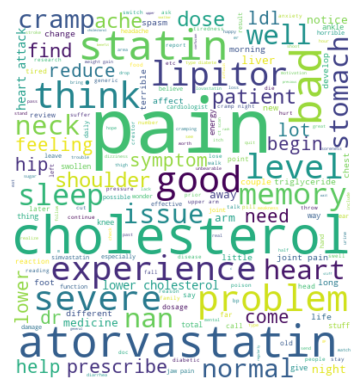

In [34]:
wordcloud = WordCloud(background_color='white')

# Create and generate a word cloud image:
wordcloud = WordCloud(width=400, height=430, background_color='white').generate(' '.join(flattened_data))

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()